In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def read_data(folder_path):
    files = [f for f in os.listdir(folder_path) if f.endswith('.parquet') or f.endswith('.csv')]
    dataframes = {}
    for file in files:
        file_path = os.path.join(folder_path, file)
        if file.endswith('.csv'):
            df = pd.read_csv(file_path)
        elif file.endswith('.parquet'):
            df = pd.read_parquet(file_path)
        dataframes[file] = df
    return dataframes

In [3]:
import pyarrow
import fastparquet
print("pyarrow and fastparquet are available")

pyarrow and fastparquet are available


In [4]:
df = pd.read_parquet("C:\\Users\\princ\\Downloads\\AmEx-25\\data\\train_data.parquet")

In [5]:
# df = pd.read_parquet("C:\\Users\\RDRL\\Downloads\\train_data.parquet")
df.head(5)

,id1,id2,id3,id4,id5,y,f1,f2,f3,f4,...,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366
0,1366776_189706075_16-23_2023-11-02 22:22:00.042,1366776,189706075,2023-11-02 22:22:00.042,2023-11-02,0,1.0,None,None,None,...,None,-9999.0,0.0,None,28.0,0.0,0.0,337.0,0.0,0.0
1,1366776_89227_16-23_2023-11-01 23:51:24.999,1366776,89227,2023-11-01 23:51:24.999,2023-11-01,0,1.0,None,None,None,...,None,None,0.0,None,87.0,0.0,0.0,1010.0,2.0,0.0019801980198019
2,1366776_35046_16-23_2023-11-01 00:30:59.797,1366776,35046,2023-11-01 00:30:59.797,2023-11-01,0,1.0,None,None,None,...,None,None,0.0,None,23.0,0.0,0.0,1010.0,2.0,0.0019801980198019
3,1366776_6275451_16-23_2023-11-02 22:21:32.261,1366776,6275451,2023-11-02 22:21:32.261,2023-11-02,0,1.0,None,None,None,...,None,-9999.0,0.0,None,277.0,1.0,0.003610108303249,337.0,0.0,0.0
4,1366776_78053_16-23_2023-11-02 22:21:34.799,1366776,78053,2023-11-02 22:21:34.799,2023-11-02,0,1.0,None,None,None,...,None,-9999.0,0.0,None,359.0,0.0,0.0,337.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770164 entries, 0 to 770163
Columns: 372 entries, id1 to f366
dtypes: object(372)
memory usage: 2.1+ GB


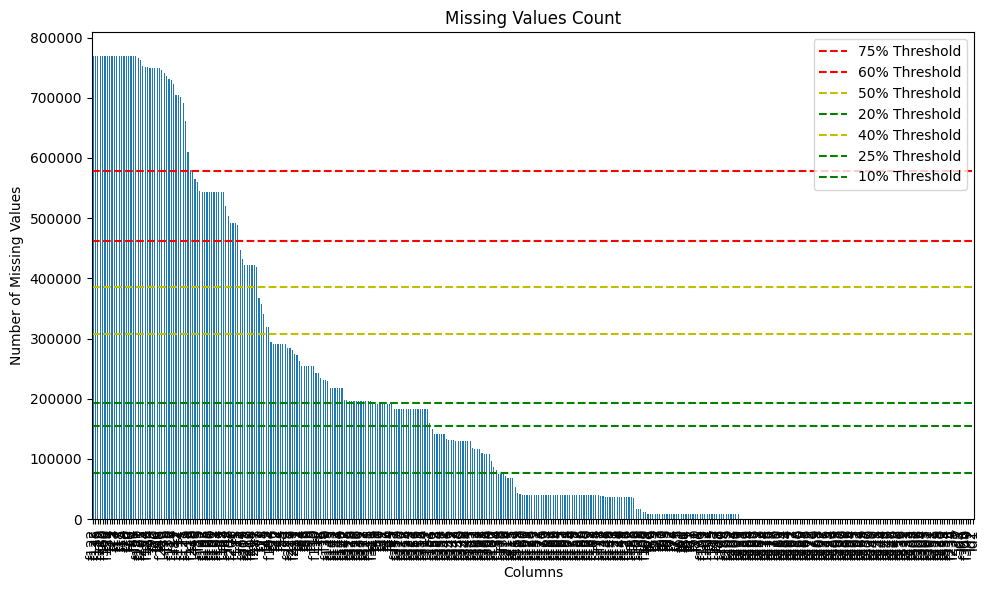

In [7]:
missing_value_count = df.isnull().sum().sort_values( ascending=False)
# plot for missing values
plt.figure(figsize=(10, 6))
missing_value_count.plot(kind='bar')
plt.axhline(y=0.75 * len(df), color='r', linestyle='--', label='75% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.60 * len(df), color='r', linestyle='--', label='60% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.50 * len(df), color='y', linestyle='--', label='50% Threshold')  # marking line for 50% missing values
plt.axhline(y=0.20* len(df), color='g', linestyle='--', label='20% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.40 * len(df), color='y', linestyle='--', label='40% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.25 * len(df), color='g', linestyle='--', label='25% Threshold')  # marking line for 50% missing values
plt.axhline(y=0.10 * len(df), color='g', linestyle='--', label='10% Threshold')  # marking line for 50% missing values
plt.legend()
plt.title('Missing Values Count')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [8]:
# features which have more than 75% missing values
features_to_drop = missing_value_count[missing_value_count > 0.75 * len(df)].index.tolist()
print("Features with more than 75% missing values:", features_to_drop)


Features with more than 75% missing values: ['f122', 'f135', 'f136', 'f112', 'f80', 'f360', 'f120', 'f34', 'f21', 'f13', 'f17', 'f18', 'f15', 'f14', 'f20', 'f19', 'f16', 'f84', 'f37', 'f189', 'f221', 'f205', 'f154', 'f176', 'f64', 'f92', 'f70', 'f66', 'f88', 'f220', 'f33', 'f79', 'f36', 'f118', 'f114', 'f81', 'f117', 'f4', 'f121', 'f3', 'f119', 'f116', 'f218']


In [9]:
# Load the dataset of data dictionary
data_dictionary = pd.read_csv(r"C:\Users\princ\Downloads\AmEx-25\details\data_dictionary.csv")

In [10]:
data_dictionary.head()

,masked_column,Description,Type
0,id1,Primary Key(masked),Key
1,id2,Customer ID (masked),-
2,id3,Offer ID,Categorical
3,id4,Event timestamp,Numerical
4,id5,Event Date,Numerical


In [11]:
def print_feature_details(features_to_drop, data_dictionary):
    for feature in features_to_drop:
        feature_info = data_dictionary[data_dictionary['masked_column'] == feature]
        if not feature_info.empty:
            for _, row in feature_info.iterrows():
                print(f"ID: {row['masked_column']}\nDescription: {row['Description']}\nType: {row['Type']}\nMissing Values: {missing_value_count[feature]}\n{'-'*60}")
        else:
            print(f"ID: {feature} - No information available in data dictionary.\n{'-'*60}")

In [12]:
# features which have more than 75% missing values
missing_value_count = missing_value_count.sort_values(ascending=False)
features_to_drop = missing_value_count[missing_value_count > 0.75 * len(df)].index.tolist()
print("Features with more than 75% missing values and their details:\n")

print_feature_details(features_to_drop, data_dictionary)

Features with more than 75% missing values and their details:

ID: f122
Description: Ratio of ctr in the last 90 days to the ctr in last 180 days for offer type Insurance
Type: Numerical
Missing Values: 770164
------------------------------------------------------------
ID: f135
Description: CTR for last 60 days  for offer type business expenses
Type: Numerical
Missing Values: 770164
------------------------------------------------------------
ID: f136
Description: CTR in last 60 days for offer type retail
Type: Numerical
Missing Values: 770164
------------------------------------------------------------
ID: f112
Description: If offer type Insurance then ctr in last 180 days
Type: Numerical
Missing Values: 770164
------------------------------------------------------------
ID: f80
Description: Ratio of no of times estatement page is viewed in last 30 days to estatement page viewed in last 180 days
Type: Numerical
Missing Values: 770086
--------------------------------------------------

In [13]:
# print the feature details with no missing values 
features_imp = missing_value_count[missing_value_count == 0].index.tolist()
print("Features with no missing values and their details:\n")
print_feature_details(features_imp, data_dictionary)

Features with no missing values and their details:

ID: y
Description: Dependent Variable
Type: Label
Missing Values: 0
------------------------------------------------------------
ID: id5
Description: Event Date
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: id4
Description: Event timestamp
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: id3
Description: Offer ID
Type: Categorical
Missing Values: 0
------------------------------------------------------------
ID: f350
Description: context variable fetched in real time where this is Number of seconds after 00:00 hrs 
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: f349
Description: context variable fetched in real time where 1 for Monday, 2 for Tuesday,&&&&, 7 for Sunday
Type: Categorical
Missing Values: 0
------------------------------------------------------------
ID: id2
Description

In [14]:
# print the feature details with 50000 missing values sorted by count
missing_value_count = missing_value_count.sort_values(ascending=True)
features_imp = missing_value_count[missing_value_count < 50000].index.tolist()
print("Features with less than 50000 missing values and their details:\n")
print_feature_details(features_imp, data_dictionary)

Features with less than 50000 missing values and their details:

ID: id1
Description: Primary Key(masked)
Type: Key
Missing Values: 0
------------------------------------------------------------
ID: id2
Description: Customer ID (masked)
Type: -
Missing Values: 0
------------------------------------------------------------
ID: id3
Description: Offer ID
Type: Categorical
Missing Values: 0
------------------------------------------------------------
ID: id4
Description: Event timestamp
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: id5
Description: Event Date
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: y
Description: Dependent Variable
Type: Label
Missing Values: 0
------------------------------------------------------------
ID: f349
Description: context variable fetched in real time where 1 for Monday, 2 for Tuesday,&&&&, 7 for Sunday
Type: Categorical
Missing Values: 0
------------

In [15]:
test_df = pd.read_parquet(r"C:\Users\princ\Downloads\AmEx-25\data\test_data.parquet")

In [16]:
test_df.head()

,id1,id2,id3,id4,id5,f1,f2,f3,f4,f5,...,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366
46756,1362907_91950_16-23_2023-11-04 18:56:26.000794,1362907,91950,2023-11-04 18:56:26.000794,2023-11-04,None,None,None,None,None,...,0.0027807272790246,0.0465999838670646,0.0,None,1.0,0.0,0.0,56.0,0.0,0.0
57819,1082599_88356_16-23_2023-11-04 06:08:53.373,1082599,88356,2023-11-04 06:08:53.373,2023-11-04,None,9.0,None,None,None,...,0.0014287946777398,0.0603093514970909,0.0,None,195.0,13.0,0.0666666666666666,None,None,None
15390,1888466_958700_16-23_2023-11-05 10:07:28.000725,1888466,958700,2023-11-05 10:07:28.000725,2023-11-05,None,None,None,None,22.0,...,-0.0174961119751166,0.0734836702954899,0.0,None,155.0,67.0,0.432258064516129,1142.0,436.0,0.3817863397548161
145730,1888971_795739_16-23_2023-11-04 12:25:28.244,1888971,795739,2023-11-04 12:25:28.244,2023-11-04,None,None,None,None,None,...,0.0013159476327096,0.040572039549215,0.0,None,None,None,None,None,None,None
146085,1256369_82296_16-23_2023-11-05 06:45:26.657,1256369,82296,2023-11-05 06:45:26.657,2023-11-05,None,None,None,None,None,...,0.0020541699799278,0.038243539079214,0.0,None,29.0,2.0,0.0689655172413793,361.0,3.0,0.0083102493074792


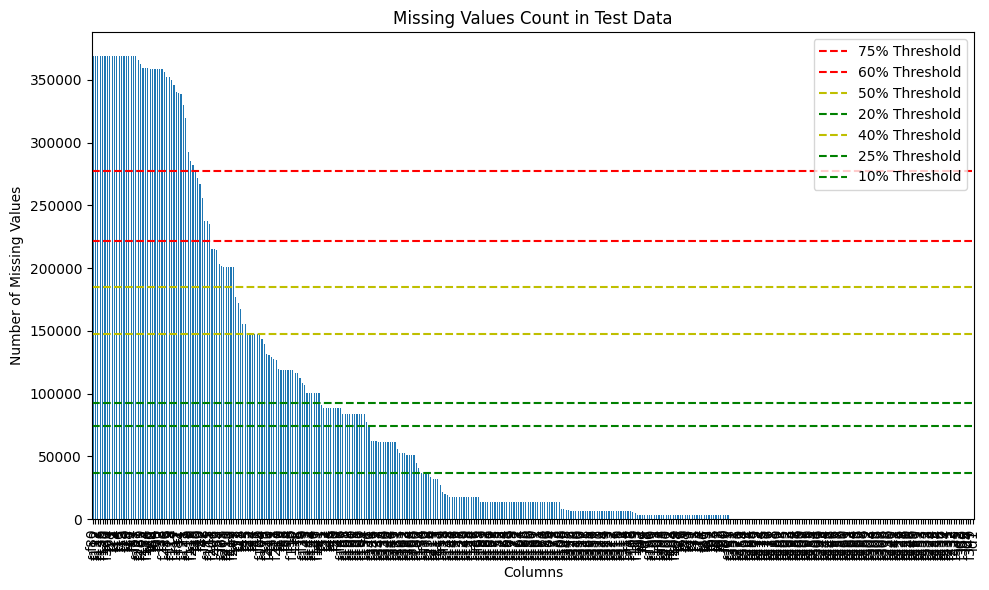

In [17]:
missing_value_count_test = test_df.isnull().sum().sort_values( ascending=False)
# plot for missing values in test data
plt.figure(figsize=(10, 6))
missing_value_count_test.plot(kind='bar')
plt.axhline(y=0.75 * len(test_df), color='r', linestyle='--', label='75% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.60 * len(test_df), color='r', linestyle='--', label='60% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.50 * len(test_df), color='y', linestyle='--', label='50% Threshold')  # marking line for 50% missing values
plt.axhline(y=0.20* len(test_df), color='g', linestyle='--', label='20% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.40 * len(test_df), color='y', linestyle='--', label='40% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.25 * len(test_df), color='g', linestyle='--', label='25% Threshold')  # marking line for 50% missing values
plt.axhline(y=0.10 * len(test_df), color='g', linestyle='--', label='10% Threshold')  # marking line for 50% missing values
plt.legend()
plt.title('Missing Values Count in Test Data')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [18]:
df.columns

Index(['id1', 'id2', 'id3', 'id4', 'id5', 'y', 'f1', 'f2', 'f3', 'f4',
       ...
       'f357', 'f358', 'f359', 'f360', 'f361', 'f362', 'f363', 'f364', 'f365',
       'f366'],
      dtype='object', length=372)

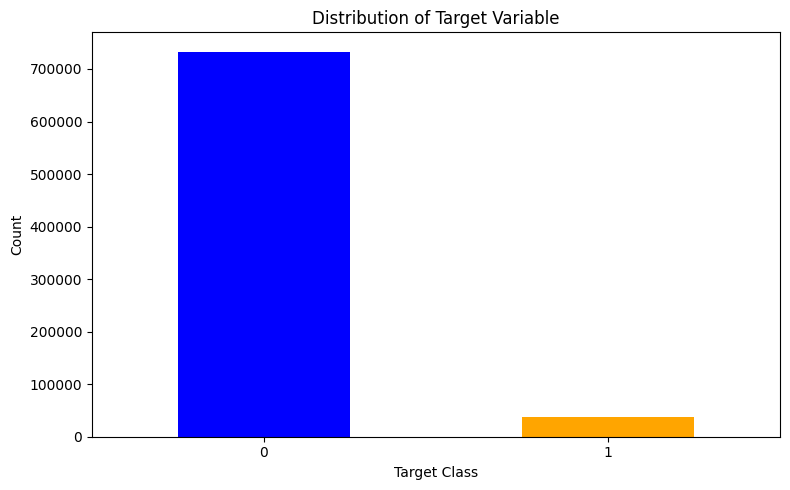

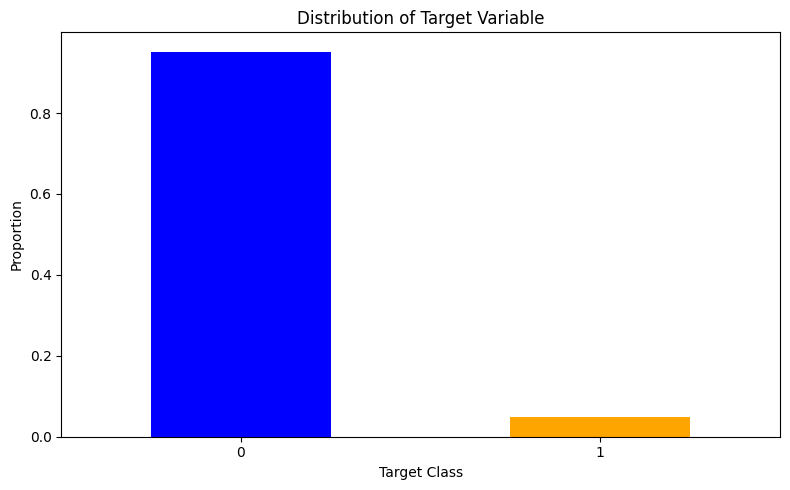

In [19]:
# Distribution of the y variable
y_distribution = df['y'].value_counts()
plt.figure(figsize=(8, 5))
y_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Normalized distribution of the y variable
y_distribution = df['y'].value_counts(normalize=True)
plt.figure(figsize=(8, 5))
y_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [20]:
df.sample(10)

,id1,id2,id3,id4,id5,y,f1,f2,f3,f4,...,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366
445211,1412225_136220_16-23_2023-11-02 13:57:08.822,1412225,136220,2023-11-02 13:57:08.822,2023-11-02,0,41.0,9.0,None,None,...,0.0009944546482164,0.043714104931329,0.0,None,4.0,0.0,0.0,52.0,1.0,0.0192307692307692
490280,1417976_357699_16-23_2023-11-03 20:11:53.900,1417976,357699,2023-11-03 20:11:53.900,2023-11-03,0,34.0,None,None,None,...,0.0028548206992132,0.0634597763590889,0.0,None,351.0,9.0,0.0256410256410256,377.0,16.0,0.0424403183023872
81182,1475774_69876_16-23_2023-11-03 18:56:30.922,1475774,69876,2023-11-03 18:56:30.922,2023-11-03,0,None,4.0,None,None,...,0.0016078262591543,0.0492677335593146,0.0,None,218.0,0.0,0.0,139.0,2.0,0.014388489208633
383862,1512024_923960_16-23_2023-11-03 14:13:07.936,1512024,923960,2023-11-03 14:13:07.936,2023-11-03,0,None,None,None,None,...,0.0023760427311054,0.0497769256295859,0.0,None,None,None,None,167.0,5.0,0.029940119760479
446774,1741823_82957_16-23_2023-11-01 05:55:48.742,1741823,82957,2023-11-01 05:55:48.742,2023-11-01,0,36.0,None,None,None,...,0.0011019644425532,0.0472569255839217,0.0,None,14.0,0.0,0.0,87.0,0.0,0.0
411037,1591428_498907_16-23_2023-11-03 07:26:34.505,1591428,498907,2023-11-03 07:26:34.505,2023-11-03,0,37.0,50.0,None,None,...,0.0050070056849731,0.1038371738072255,0.0,None,7.0,0.0,0.0,96.0,0.0,0.0
393660,1264049_920925_16-23_2023-11-03 14:51:00.534,1264049,920925,2023-11-03 14:51:00.534,2023-11-03,0,None,None,None,None,...,0.0009108739794562,0.0650006922331441,0.0,None,47.0,4.0,0.0851063829787234,62.0,4.0,0.064516129032258
132205,1411333_31794_16-23_2023-11-02 10:25:20.829,1411333,31794,2023-11-02 10:25:20.829,2023-11-02,0,None,None,None,None,...,None,None,0.0,None,135.0,9.0,0.0666666666666666,525.0,33.0,0.0628571428571428
567783,1700868_409095733_16-23_2023-11-03 07:11:08.889,1700868,409095733,2023-11-03 07:11:08.889,2023-11-03,0,None,None,None,None,...,None,-9999.0,0.0,None,8.0,0.0,0.0,91.0,0.0,0.0
556067,1071565_93761_16-23_2023-11-01 20:31:05.299,1071565,93761,2023-11-01 20:31:05.299,2023-11-01,0,40.0,40.0,None,None,...,-0.0020909082393155,0.0664798167959804,0.0,None,41.0,1.0,0.024390243902439,485.0,6.0,0.0123711340206185


In [21]:
# Rearrange the features in ascending order of missing values in a new DataFrame
sorted_columns = missing_value_count.sort_values(ascending=True).index.tolist()
df_sorted = df[sorted_columns]
df_sorted.sample(10)

,id1,id2,id3,id4,id5,y,f349,f350,f232,f233,...,f20,f14,f34,f120,f360,f80,f112,f136,f135,f122
580164,1455002_633765_16-23_2023-11-02 19:38:43.391,1455002,633765,2023-11-02 19:38:43.391,2023-11-02,0,5,70681,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
128920,1646829_481197_16-23_2023-11-01 22:37:25.815,1646829,481197,2023-11-01 22:37:25.815,2023-11-01,0,4,81403,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
764188,1539717_63062_16-23_2023-11-02 08:28:10.794,1539717,63062,2023-11-02 08:28:10.794,2023-11-02,0,5,30483,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
696719,1092884_958700_16-23_2023-11-02 06:45:21.332,1092884,958700,2023-11-02 06:45:21.332,2023-11-02,0,5,24306,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
95986,1168246_82883_16-23_2023-11-03 02:41:17.398,1168246,82883,2023-11-03 02:41:17.398,2023-11-03,0,6,9580,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
488799,1157559_890281_16-23_2023-11-02 13:11:53.828,1157559,890281,2023-11-02 13:11:53.828,2023-11-02,0,5,47441,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
608605,1497100_65699008_16-23_2023-11-01 00:08:57.000252,1497100,65699008,2023-11-01 00:08:57.000252,2023-11-01,1,4,514,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
204100,1285323_45856_16-23_2023-11-02 18:35:52.734,1285323,45856,2023-11-02 18:35:52.734,2023-11-02,0,5,66951,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
285328,1040089_93192_16-23_2023-11-01 16:27:05.421,1040089,93192,2023-11-01 16:27:05.421,2023-11-01,0,4,59223,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
745963,1757348_25852_16-23_2023-11-03 11:35:45.778,1757348,25852,2023-11-03 11:35:45.778,2023-11-03,0,6,41606,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None


In [22]:
df.shape

(770164, 372)

In [23]:
df_sorted.sample(10)

,id1,id2,id3,id4,id5,y,f349,f350,f232,f233,...,f20,f14,f34,f120,f360,f80,f112,f136,f135,f122
702580,1311993_721756_16-23_2023-11-03 07:06:28.269,1311993,721756,2023-11-03 07:06:28.269,2023-11-03,0,6,25578,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
37580,1107354_45856_16-23_2023-11-03 00:07:22.759,1107354,45856,2023-11-03 00:07:22.759,2023-11-03,0,6,436,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
193420,1076367_25086_16-23_2023-11-02 18:19:59.193,1076367,25086,2023-11-02 18:19:59.193,2023-11-02,0,5,65991,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
595996,1793208_181112_16-23_2023-11-02 20:59:04.935,1793208,181112,2023-11-02 20:59:04.935,2023-11-02,0,5,75442,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
747864,1530400_62395_16-23_2023-11-01 01:31:07.457,1530400,62395,2023-11-01 01:31:07.457,2023-11-01,0,4,5466,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
575500,1839139_78053_16-23_2023-11-01 09:45:28.259,1839139,78053,2023-11-01 09:45:28.259,2023-11-01,0,4,35073,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
285064,1887109_29416_16-23_2023-11-01 12:41:29.602,1887109,29416,2023-11-01 12:41:29.602,2023-11-01,0,4,45075,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
347685,1116336_80076_16-23_2023-11-01 14:29:36.578,1116336,80076,2023-11-01 14:29:36.578,2023-11-01,0,4,52156,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
567363,1580042_88933_16-23_2023-11-01 17:22:41.317,1580042,88933,2023-11-01 17:22:41.317,2023-11-01,0,4,62542,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
695169,1651725_30717_16-23_2023-11-01 04:46:17.725,1651725,30717,2023-11-01 04:46:17.725,2023-11-01,0,4,16966,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None


In [24]:
print_feature_details(sorted_columns,data_dictionary)

ID: id1
Description: Primary Key(masked)
Type: Key
Missing Values: 0
------------------------------------------------------------
ID: id2
Description: Customer ID (masked)
Type: -
Missing Values: 0
------------------------------------------------------------
ID: id3
Description: Offer ID
Type: Categorical
Missing Values: 0
------------------------------------------------------------
ID: id4
Description: Event timestamp
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: id5
Description: Event Date
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: y
Description: Dependent Variable
Type: Label
Missing Values: 0
------------------------------------------------------------
ID: f349
Description: context variable fetched in real time where 1 for Monday, 2 for Tuesday,&&&&, 7 for Sunday
Type: Categorical
Missing Values: 0
------------------------------------------------------------
ID: f350
Descrip

In [25]:
# rearranging in ascending order of missing values less than 25%
sorted_columns = missing_value_count[missing_value_count < 0.25 * len(df)].sort_values(ascending=True).index.tolist()
df_25 = df[sorted_columns]

In [26]:
def impute_missing_values(df, strategy='median'):
    df_imputed = df.copy()
    for column in df_imputed.columns:
        if df_imputed[column].isnull().any():
            if df_imputed[column].dtype == 'float64':
                if strategy == 'mean':
                    df_imputed[column].fillna(df_imputed[column].mean(), inplace=True)
                elif strategy == 'median':
                    df_imputed[column].fillna(df_imputed[column].median(), inplace=True)
            # elif str(df_imputed[column].dtype) in ['category', 'object']:
            #     df_imputed[column].fillna(df_imputed[column].mode()[0], inplace=True)
    return df_imputed

In [27]:
# converting the column of df to respective dtypes as mentioned in the data dictionary
def convert_column_types(df, data_dictionary):
    type_map = {
        'Numerical': 'float64',
        'Categorical': 'category',
        'Key': 'category',
        'Label': 'category',
        'One hot encoded': 'category',
        '-': 'object',
    }
    for column in df.columns:
        if column in data_dictionary['masked_column'].values:
            dtype = data_dictionary.loc[data_dictionary['masked_column'] == column, 'Type'].iloc[0]
            if dtype in type_map:
                try:
                    df[column] = df[column].astype(type_map[dtype])
                except Exception as e:
                    print(f"Could not convert {column} to {type_map[dtype]}: {e}")
    return df

In [28]:
df_25 = convert_column_types(df_25,data_dictionary)

C:\Users\princ\AppData\Local\Temp\ipykernel_32960\4006871157.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(type_map[dtype])
C:\Users\princ\AppData\Local\Temp\ipykernel_32960\4006871157.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(type_map[dtype])
C:\Users\princ\AppData\Local\Temp\ipykernel_32960\4006871157.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Could not convert id4 to float64: could not convert string to float: '2023-11-02 22:22:00.042'
Could not convert id5 to float64: could not convert string to float: '2023-11-02'


C:\Users\princ\AppData\Local\Temp\ipykernel_32960\4006871157.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(type_map[dtype])
C:\Users\princ\AppData\Local\Temp\ipykernel_32960\4006871157.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(type_map[dtype])
C:\Users\princ\AppData\Local\Temp\ipykernel_32960\4006871157.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [29]:
df_25.dtypes.value_counts()

float64     160
category     48
category     36
object        3
category      2
category      1
category      1
category      1
category      1
category      1
Name: count, dtype: int64

In [30]:
def print_object_columns(df):
    dtype_groups = {}
    for col in df.columns:
        dtype_str = str(df[col].dtype)
        dtype_groups.setdefault(dtype_str, []).append(col)
    for dtype, cols in dtype_groups.items():
        print(f"\nColumns with dtype '{dtype}' ({len(cols)} columns):")
        for col in cols:
            print(f"  - {col}")

In [31]:
print_object_columns(df_25)


Columns with dtype 'category' (91 columns):
  - id1
  - id3
  - y
  - f349
  - f232
  - f233
  - f249
  - f242
  - f250
  - f236
  - f231
  - f302
  - f301
  - f292
  - f291
  - f282
  - f299
  - f237
  - f300
  - f239
  - f240
  - f308
  - f307
  - f306
  - f305
  - f304
  - f303
  - f247
  - f248
  - f268
  - f267
  - f227
  - f226
  - f309
  - f298
  - f297
  - f290
  - f289
  - f296
  - f295
  - f294
  - f293
  - f281
  - f254
  - f263
  - f264
  - f261
  - f262
  - f257
  - f258
  - f241
  - f238
  - f243
  - f244
  - f245
  - f246
  - f270
  - f269
  - f253
  - f256
  - f283
  - f284
  - f285
  - f286
  - f287
  - f288
  - f273
  - f274
  - f275
  - f276
  - f277
  - f278
  - f279
  - f280
  - f255
  - f230
  - f229
  - f228
  - f252
  - f251
  - f260
  - f259
  - f265
  - f266
  - f272
  - f271
  - f235
  - f234
  - f354
  - f50
  - f52

Columns with dtype 'object' (3 columns):
  - id2
  - id4
  - id5

Columns with dtype 'float64' (160 columns):
  - f350
  - f332
  - f225
  - f

In [32]:
df_25

,id1,id2,id3,id4,id5,y,f349,f350,f232,f233,...,f41,f45,f44,f46,f47,f51,f50,f52,f49,f313
0,1366776_189706075_16-23_2023-11-02 22:22:00.042,1366776,189706075,2023-11-02 22:22:00.042,2023-11-02,0,5,80458.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1366776_89227_16-23_2023-11-01 23:51:24.999,1366776,89227,2023-11-01 23:51:24.999,2023-11-01,0,4,85874.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1366776_35046_16-23_2023-11-01 00:30:59.797,1366776,35046,2023-11-01 00:30:59.797,2023-11-01,0,4,1855.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1366776_6275451_16-23_2023-11-02 22:21:32.261,1366776,6275451,2023-11-02 22:21:32.261,2023-11-02,0,5,80458.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1366776_78053_16-23_2023-11-02 22:21:34.799,1366776,78053,2023-11-02 22:21:34.799,2023-11-02,0,5,80458.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770159,1896641_87731_16-23_2023-11-02 08:14:21.524,1896641,87731,2023-11-02 08:14:21.524,2023-11-02,0,5,29659.0,0.0,0.0,...,68.02,8.0,0.0,38251.0,43867.0,8518.0,N,N,0.0,0.054501
770160,1896641_505604_16-23_2023-11-02 08:14:24.458,1896641,505604,2023-11-02 08:14:24.458,2023-11-02,0,5,29659.0,1.0,0.0,...,68.02,8.0,0.0,38251.0,43867.0,8518.0,N,N,0.0,0.055537
770161,1896641_25212_16-23_2023-11-02 08:14:25.748,1896641,25212,2023-11-02 08:14:25.748,2023-11-02,0,5,29659.0,1.0,0.0,...,68.02,8.0,0.0,38251.0,43867.0,8518.0,N,N,0.0,0.057477
770162,1900765_95157_16-23_2023-11-02 06:08:25.900,1900765,95157,2023-11-02 06:08:25.900,2023-11-02,0,5,22103.0,0.0,0.0,...,102.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
data_dictionary['Type'].unique()

array(['Key', '-', 'Categorical', 'Numerical', 'Label', 'One hot encoded'],
      dtype=object)

In [34]:
# values count of each unique values in data_dictionary 
value_counts = data_dictionary['Type'].value_counts()
print("Unique values count in data dictionary:")
print(value_counts)


Unique values count in data dictionary:
Type
Numerical          273
One hot encoded     84
Categorical         12
Key                  1
-                    1
Label                1
Name: count, dtype: int64


In [35]:
# Count the number of columns with missing values grouped by dtype in df_25 out of total columns of particular dtype
missing_cols = df_25.columns[df_25.isnull().any()]
dtype_counts = df_25[missing_cols].dtypes.value_counts()
print("Number of columns with missing values grouped by dtype in df_25:")
print(dtype_counts)

Number of columns with missing values grouped by dtype in df_25:
float64     159
category     48
category     36
category      2
category      1
Name: count, dtype: int64


In [36]:
df_25.dtypes.value_counts()

float64     160
category     48
category     36
object        3
category      2
category      1
category      1
category      1
category      1
category      1
Name: count, dtype: int64

In [37]:
df_25_imp = impute_missing_values(df_25, strategy='median')

C:\Users\princ\AppData\Local\Temp\ipykernel_32960\3704776812.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[column].fillna(df_imputed[column].median(), inplace=True)
C:\Users\princ\AppData\Local\Temp\ipykernel_32960\3704776812.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [38]:

df_25_imp.isnull().sum().sort_values(ascending=False)[:90]

f50     190663
f52     190663
f354    141991
f249        18
f236        18
         ...  
f245        18
f270        18
f350         0
id1          0
f332         0
Length: 90, dtype: int64

In [39]:
# printing dtype of column having missing values greater than 0 in df_25_imp



missing_value_count_imp = df_25_imp.isnull().sum().sort_values(ascending=False)
missing_value_count_imp = missing_value_count_imp[missing_value_count_imp > 0]
print("Columns with missing values in df_25_imp:")
for col, count in missing_value_count_imp.items():
    print(f"{col}: {count} missing values")


Columns with missing values in df_25_imp:
f50: 190663 missing values
f52: 190663 missing values
f354: 141991 missing values
f249: 18 missing values
f236: 18 missing values
f250: 18 missing values
f237: 18 missing values
f299: 18 missing values
f291: 18 missing values
f282: 18 missing values
f292: 18 missing values
f242: 18 missing values
f232: 18 missing values
f233: 18 missing values
f308: 18 missing values
f300: 18 missing values
f239: 18 missing values
f240: 18 missing values
f306: 18 missing values
f307: 18 missing values
f305: 18 missing values
f309: 18 missing values
f226: 18 missing values
f227: 18 missing values
f267: 18 missing values
f268: 18 missing values
f248: 18 missing values
f301: 18 missing values
f302: 18 missing values
f231: 18 missing values
f261: 18 missing values
f262: 18 missing values
f257: 18 missing values
f293: 18 missing values
f281: 18 missing values
f254: 18 missing values
f263: 18 missing values
f264: 18 missing values
f241: 18 missing values
f290: 18 mis

In [40]:
def impute_one_hot_encoded_with_zero(df, data_dictionary):
    """
    Impute missing values in one-hot encoded columns with zero.
    Skips columns explicitly listed in the skip_cols list.
    """
    # You can adjust this list as needed
    skip_cols = {"f50", "f52", "f354"}
    # Select columns marked as 'One hot encoded' in the data dictionary
    one_hot_cols = data_dictionary[data_dictionary['Type']=='category']['masked_column']
    df_imputed = df.copy()
    for col in one_hot_cols:
        if col in skip_cols:
            continue
        elif col in df_imputed.columns:
            df_imputed[col] = df_imputed[col].fillna(0)
    return df_imputed

In [41]:
# imputing one hot encoded columns with zero
df_one = impute_one_hot_encoded_with_zero(df_25_imp, data_dictionary)

In [42]:
df_one.isnull().sum().sort_values(ascending=False)[:90]

f50     190663
f52     190663
f354    141991
f249        18
f236        18
         ...  
f245        18
f270        18
f350         0
id1          0
f332         0
Length: 90, dtype: int64

In [43]:
df_25_imp['id2'].nunique()

46550

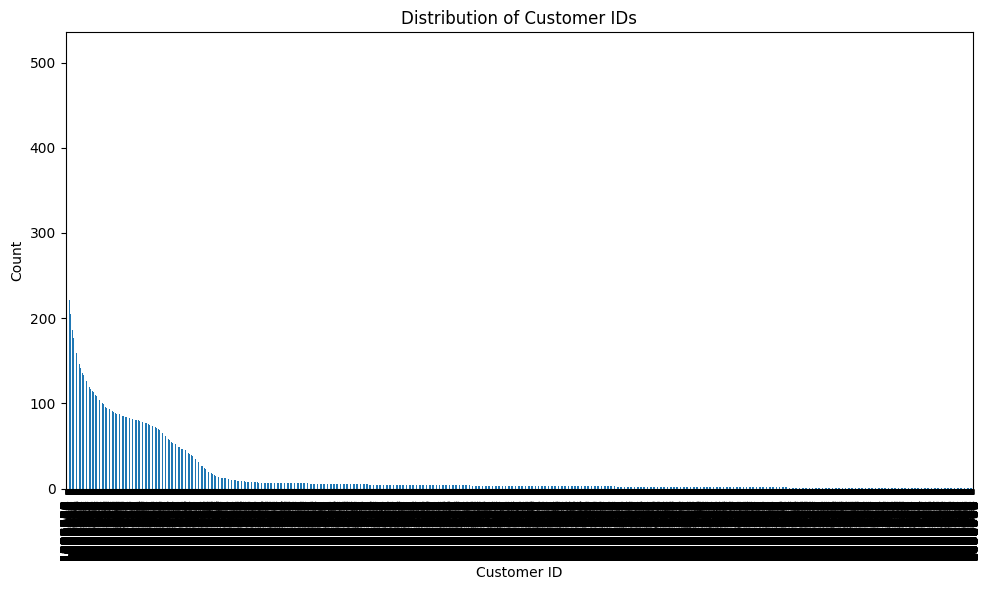

In [44]:
# Distribution of the coustomer id
plt.figure(figsize=(10, 6)) 
df_25_imp['id2'].value_counts().plot(kind='bar')
plt.title('Distribution of Customer IDs')
plt.xlabel('Customer ID')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()


In [45]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Example: Calculate Cramér's V for all categorical columns vs target 'y'
cat_cols = df.select_dtypes(include=['category', 'object']).columns
target = 'y'  # replace with your target column name if different

cramers_v_results = {}
for col in cat_cols:
    if col != target:
        try:
            value = cramers_v(df[col], df[target])
            cramers_v_results[col] = value
        except Exception as e:
            print(f"Could not calculate for {col}: {e}")

# Show sorted results
cramers_v_sorted = sorted(cramers_v_results.items(), key=lambda x: x[1], reverse=True)
for col, val in cramers_v_sorted:
    print(f"{col}: Cramér's V = {val:.4f}")

C:\Users\princ\AppData\Local\Temp\ipykernel_32960\2698489115.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\princ\AppData\Local\Temp\ipykernel_32960\2698489115.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\princ\AppData\Local\Temp\ipykernel_32960\2698489115.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\princ\AppData\Local\Temp\ipykernel_32960\2698489115.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\princ\AppData\Local\Temp\ipykernel_32960\2698489115.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\princ\AppData\Local\Temp\ipykernel_32960\2698489115.py:14: RuntimeWarning: invali

Could not calculate for f112: No data; `observed` has size 0.


C:\Users\princ\AppData\Local\Temp\ipykernel_32960\2698489115.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


Could not calculate for f122: No data; `observed` has size 0.


C:\Users\princ\AppData\Local\Temp\ipykernel_32960\2698489115.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\princ\AppData\Local\Temp\ipykernel_32960\2698489115.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


Could not calculate for f135: No data; `observed` has size 0.
Could not calculate for f136: No data; `observed` has size 0.


C:\Users\princ\AppData\Local\Temp\ipykernel_32960\2698489115.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\princ\AppData\Local\Temp\ipykernel_32960\2698489115.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\princ\AppData\Local\Temp\ipykernel_32960\2698489115.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\princ\AppData\Local\Temp\ipykernel_32960\2698489115.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\princ\AppData\Local\Temp\ipykernel_32960\2698489115.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\princ\AppData\Local\Temp\ipykernel_32960\2698489115.py:14: RuntimeWarning: invali

id1: Cramér's V = nan
f202: Cramér's V = 0.6745
f200: Cramér's V = 0.6743
f203: Cramér's V = 0.6702
f204: Cramér's V = 0.6665
id2: Cramér's V = 0.6611
f199: Cramér's V = 0.6118
f201: Cramér's V = 0.5669
f198: Cramér's V = 0.2511
f192: Cramér's V = 0.2309
id3: Cramér's V = 0.2183
f193: Cramér's V = 0.2145
f186: Cramér's V = 0.1964
f196: Cramér's V = 0.1773
f4: Cramér's V = 0.1705
f3: Cramér's V = 0.1693
f14: Cramér's V = nan
f15: Cramér's V = nan
f16: Cramér's V = nan
f17: Cramér's V = nan
f19: Cramér's V = nan
f20: Cramér's V = nan
f21: Cramér's V = nan
f23: Cramér's V = nan
f24: Cramér's V = nan
f25: Cramér's V = nan
f31: Cramér's V = 0.7180
f30: Cramér's V = 0.6944
f28: Cramér's V = 0.6791
f39: Cramér's V = 0.6311
f40: Cramér's V = 0.5440
f29: Cramér's V = 0.4857
f36: Cramér's V = 0.3841
f22: Cramér's V = 0.1612
f33: Cramér's V = 0.1364
f38: Cramér's V = 0.1350
f2: Cramér's V = 0.1188
f1: Cramér's V = 0.1068
f11: Cramér's V = 0.1050
f9: Cramér's V = 0.0992
id4: Cramér's V = 0.0939
f1

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

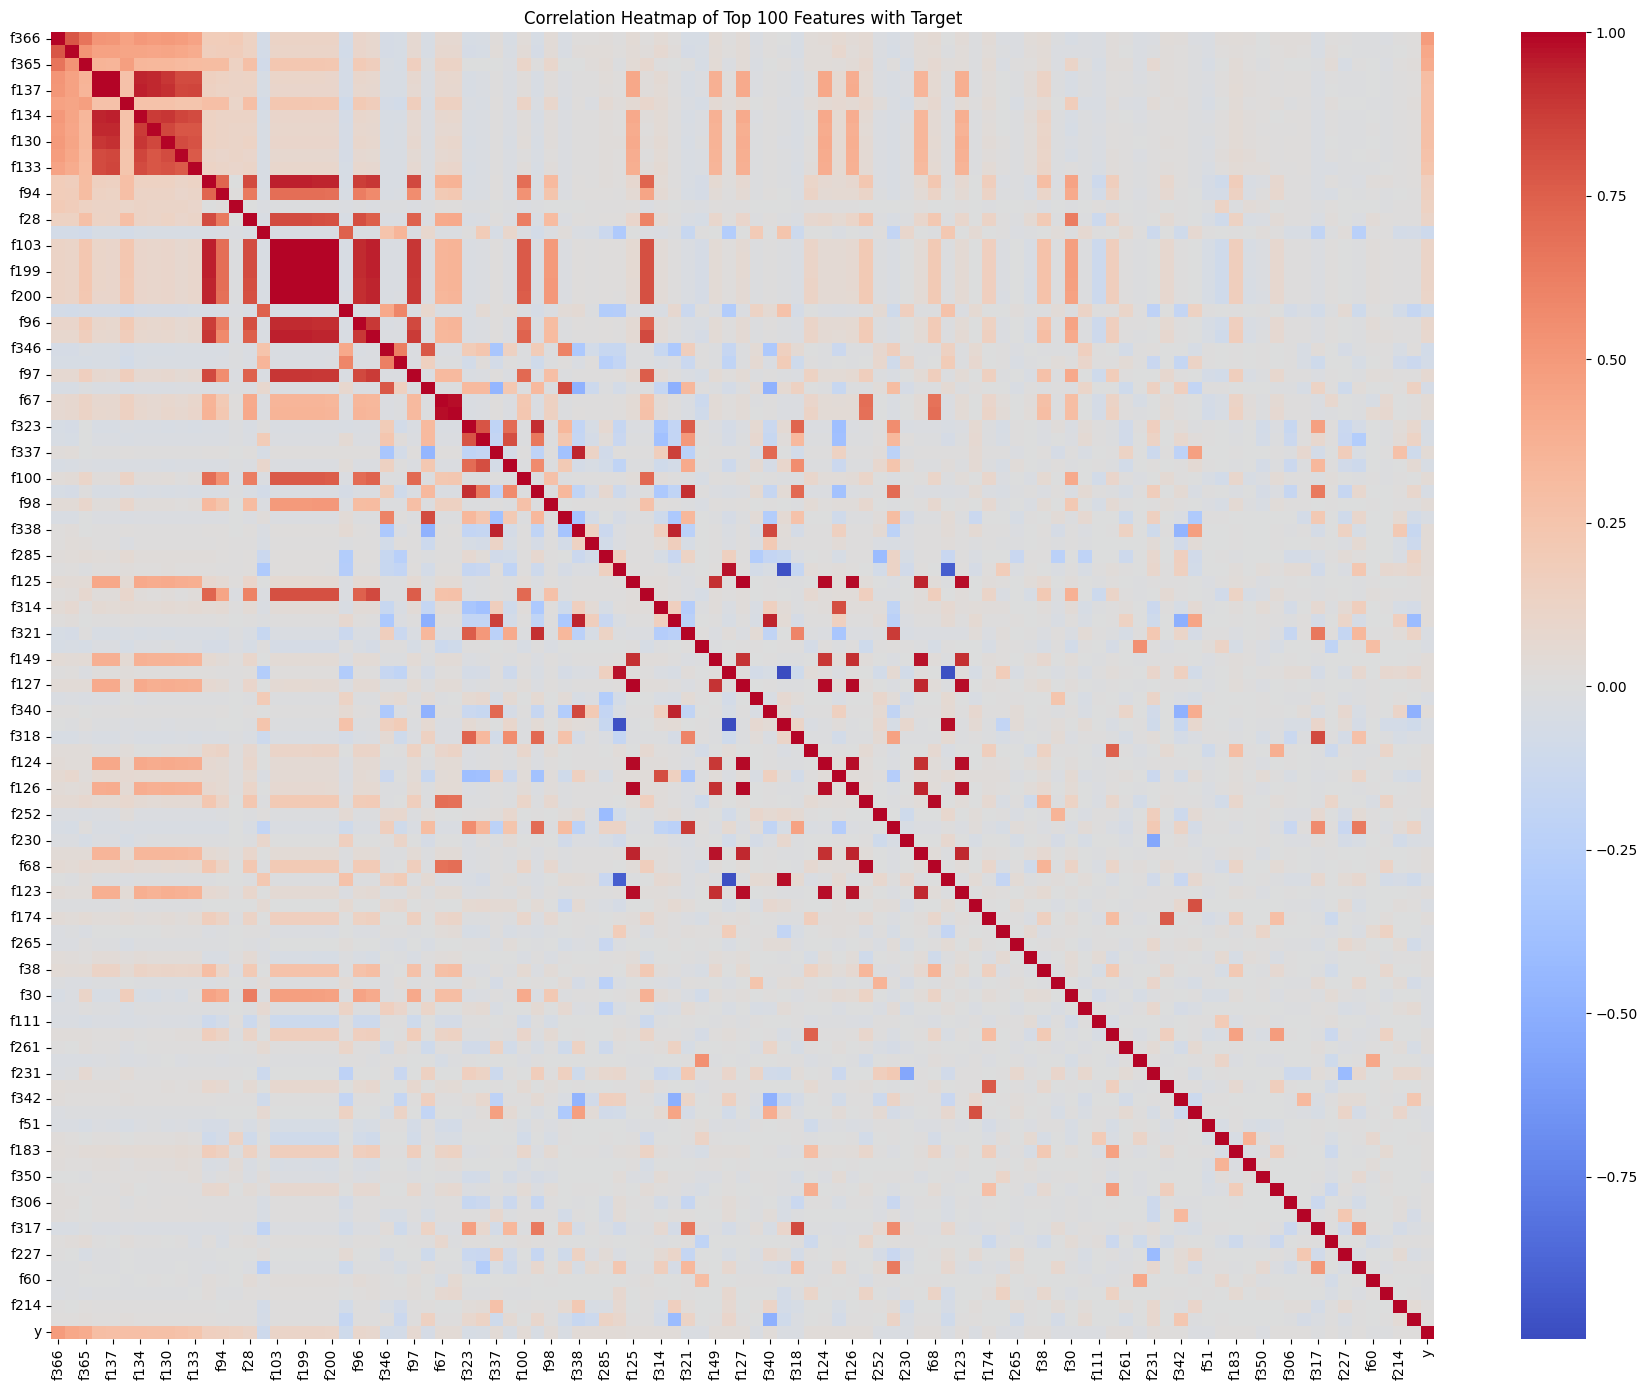

In [47]:
# Select only numerical and one hot encoded columns (excluding the target 'y')
numerical_cols = df_25_imp.select_dtypes(include=['float64', 'int64']).columns.tolist()
one_hot_cols = data_dictionary[data_dictionary['Type'] == 'One hot encoded']['masked_column'].tolist()
feature_cols = [col for col in numerical_cols + one_hot_cols if col in df_25_imp.columns and col != 'y']

# Compute correlation with the target variable 'y'
correlations = df_25_imp[feature_cols + ['y']].corr()['y'].abs().drop('y').sort_values(ascending=False)

# Select top 100 features most correlated with 'y'
top_100_features = correlations.head(100).index.tolist()

# Compute correlation matrix for these top 100 features + target
corr_matrix = df_25_imp[top_100_features + ['y']].corr()

# Plot heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, cbar=True)
plt.title('Correlation Heatmap of Top 100 Features with Target')
plt.tight_layout()
plt.show()

In [48]:
print_feature_details(df_25_imp.columns, data_dictionary)


ID: id1
Description: Primary Key(masked)
Type: Key
Missing Values: 0
------------------------------------------------------------
ID: id2
Description: Customer ID (masked)
Type: -
Missing Values: 0
------------------------------------------------------------
ID: id3
Description: Offer ID
Type: Categorical
Missing Values: 0
------------------------------------------------------------
ID: id4
Description: Event timestamp
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: id5
Description: Event Date
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: y
Description: Dependent Variable
Type: Label
Missing Values: 0
------------------------------------------------------------
ID: f349
Description: context variable fetched in real time where 1 for Monday, 2 for Tuesday,&&&&, 7 for Sunday
Type: Categorical
Missing Values: 0
------------------------------------------------------------
ID: f350
Descrip

In [49]:
def impute_one_hot_encoded_with_median(df, data_dictionary):
    skip_cols = {"f50", "f52", "f354"}
    one_hot_cols = data_dictionary[data_dictionary['Type'].str.lower().str.contains('one hot')]['masked_column'].tolist()
    
    cols_to_impute = [
        col for col in one_hot_cols
        if col in df.columns and col not in skip_cols and df[col].isnull().any()
    ]
    
    df_imputed = df.copy()
    
    for col in cols_to_impute:
        # Coerce to numeric if needed
        df_imputed[col] = pd.to_numeric(df_imputed[col], errors='coerce')
        median_val = df_imputed[col].median()
        if pd.notna(median_val):
            df_imputed[col] = df_imputed[col].fillna(median_val)
        else:
            print(f"⚠️ Skipping column {col} — median is NaN (possibly all missing)")
    
    return df_imputed


In [50]:
df_25_imp = impute_one_hot_encoded_with_median(df_25_imp, data_dictionary)
# Count total missing values across all columns
total_missing = df_25_imp.isnull().sum().sum()
print(f"✅ Total missing values after imputation: {total_missing}")


✅ Total missing values after imputation: 523317


In [51]:
print(df_25_imp.isnull().sum().sort_values(ascending=False)[:90])
print("Total number of columns with null values in df_25_imp:", df_25_imp.isnull().sum().sum())   

f50     190663
f52     190663
f354    141991
id3          0
id1          0
         ...  
f230         0
f229         0
f228         0
f252         0
f251         0
Length: 90, dtype: int64
Total number of columns with null values in df_25_imp: 523317


In [52]:
df_25_imp

,id1,id2,id3,id4,id5,y,f349,f350,f232,f233,...,f41,f45,f44,f46,f47,f51,f50,f52,f49,f313
0,1366776_189706075_16-23_2023-11-02 22:22:00.042,1366776,189706075,2023-11-02 22:22:00.042,2023-11-02,0,5,80458.0,0.0,0.0,...,602.15,0.0,0.0,6277.0,7613.0,3166.0,NaN,NaN,0.0,0.061555
1,1366776_89227_16-23_2023-11-01 23:51:24.999,1366776,89227,2023-11-01 23:51:24.999,2023-11-01,0,4,85874.0,0.0,0.0,...,602.15,0.0,0.0,6277.0,7613.0,3166.0,NaN,NaN,0.0,0.061555
2,1366776_35046_16-23_2023-11-01 00:30:59.797,1366776,35046,2023-11-01 00:30:59.797,2023-11-01,0,4,1855.0,0.0,0.0,...,602.15,0.0,0.0,6277.0,7613.0,3166.0,NaN,NaN,0.0,0.061555
3,1366776_6275451_16-23_2023-11-02 22:21:32.261,1366776,6275451,2023-11-02 22:21:32.261,2023-11-02,0,5,80458.0,0.0,0.0,...,602.15,0.0,0.0,6277.0,7613.0,3166.0,NaN,NaN,0.0,0.061555
4,1366776_78053_16-23_2023-11-02 22:21:34.799,1366776,78053,2023-11-02 22:21:34.799,2023-11-02,0,5,80458.0,0.0,0.0,...,602.15,0.0,0.0,6277.0,7613.0,3166.0,NaN,NaN,0.0,0.061555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770159,1896641_87731_16-23_2023-11-02 08:14:21.524,1896641,87731,2023-11-02 08:14:21.524,2023-11-02,0,5,29659.0,0.0,0.0,...,68.02,8.0,0.0,38251.0,43867.0,8518.0,N,N,0.0,0.054501
770160,1896641_505604_16-23_2023-11-02 08:14:24.458,1896641,505604,2023-11-02 08:14:24.458,2023-11-02,0,5,29659.0,1.0,0.0,...,68.02,8.0,0.0,38251.0,43867.0,8518.0,N,N,0.0,0.055537
770161,1896641_25212_16-23_2023-11-02 08:14:25.748,1896641,25212,2023-11-02 08:14:25.748,2023-11-02,0,5,29659.0,1.0,0.0,...,68.02,8.0,0.0,38251.0,43867.0,8518.0,N,N,0.0,0.057477
770162,1900765_95157_16-23_2023-11-02 06:08:25.900,1900765,95157,2023-11-02 06:08:25.900,2023-11-02,0,5,22103.0,0.0,0.0,...,102.50,0.0,0.0,6277.0,7613.0,3166.0,NaN,NaN,0.0,0.061555


In [54]:
def one_hot_encode_f52(df):
    df_copy = df.copy()
    
    # Step 1: Replace missing values in 'f52' with mode
    mode_val = df_copy['f52'].mode(dropna=True)
    if not mode_val.empty:
        mode_val = mode_val.iloc[0]  # Take the first mode if multiple
        df_copy['f52'] = df_copy['f52'].fillna(mode_val)
    else:
        print("⚠️ Column 'f52' has no non-null values to compute mode.")
    
    # Step 2: One-hot encode the filled column
    df_copy['f52'] = df_copy['f52'].str.upper()  # Just in case 'y'/'n' are lowercase
    df_copy['f52_Y'] = (df_copy['f52'] == 'Y').astype(int)
    df_copy['f52_N'] = (df_copy['f52'] == 'N').astype(int)
    
    return df_copy


In [58]:
df_25_imp1= one_hot_encode_f52(df_25_imp)
df_25_imp1.isnull().sum().sort_values(ascending=False)[:90]
df_25_imp1= df_25_imp1.drop(columns=['f52', 'f52_N'])

In [60]:
df_25_imp1

,id1,id2,id3,id4,id5,y,f349,f350,f232,f233,...,f41,f45,f44,f46,f47,f51,f50,f49,f313,f52_Y
0,1366776_189706075_16-23_2023-11-02 22:22:00.042,1366776,189706075,2023-11-02 22:22:00.042,2023-11-02,0,5,80458.0,0.0,0.0,...,602.15,0.0,0.0,6277.0,7613.0,3166.0,NaN,0.0,0.061555,0
1,1366776_89227_16-23_2023-11-01 23:51:24.999,1366776,89227,2023-11-01 23:51:24.999,2023-11-01,0,4,85874.0,0.0,0.0,...,602.15,0.0,0.0,6277.0,7613.0,3166.0,NaN,0.0,0.061555,0
2,1366776_35046_16-23_2023-11-01 00:30:59.797,1366776,35046,2023-11-01 00:30:59.797,2023-11-01,0,4,1855.0,0.0,0.0,...,602.15,0.0,0.0,6277.0,7613.0,3166.0,NaN,0.0,0.061555,0
3,1366776_6275451_16-23_2023-11-02 22:21:32.261,1366776,6275451,2023-11-02 22:21:32.261,2023-11-02,0,5,80458.0,0.0,0.0,...,602.15,0.0,0.0,6277.0,7613.0,3166.0,NaN,0.0,0.061555,0
4,1366776_78053_16-23_2023-11-02 22:21:34.799,1366776,78053,2023-11-02 22:21:34.799,2023-11-02,0,5,80458.0,0.0,0.0,...,602.15,0.0,0.0,6277.0,7613.0,3166.0,NaN,0.0,0.061555,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770159,1896641_87731_16-23_2023-11-02 08:14:21.524,1896641,87731,2023-11-02 08:14:21.524,2023-11-02,0,5,29659.0,0.0,0.0,...,68.02,8.0,0.0,38251.0,43867.0,8518.0,N,0.0,0.054501,0
770160,1896641_505604_16-23_2023-11-02 08:14:24.458,1896641,505604,2023-11-02 08:14:24.458,2023-11-02,0,5,29659.0,1.0,0.0,...,68.02,8.0,0.0,38251.0,43867.0,8518.0,N,0.0,0.055537,0
770161,1896641_25212_16-23_2023-11-02 08:14:25.748,1896641,25212,2023-11-02 08:14:25.748,2023-11-02,0,5,29659.0,1.0,0.0,...,68.02,8.0,0.0,38251.0,43867.0,8518.0,N,0.0,0.057477,0
770162,1900765_95157_16-23_2023-11-02 06:08:25.900,1900765,95157,2023-11-02 06:08:25.900,2023-11-02,0,5,22103.0,0.0,0.0,...,102.50,0.0,0.0,6277.0,7613.0,3166.0,NaN,0.0,0.061555,0
